In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('../data/tokenized/02_data_cleaned_full_with_tokens_and_camelbert_scores.csv')
print(df.shape)
df[['rating', 'rating_normalized', 'camelbert_sentiment_score']].head()

(87812, 53)


,rating,rating_normalized,camelbert_sentiment_score
0,10.0,1.0,10.0
1,9.0,0.9,7.4
2,9.0,0.9,10.0
3,8.0,0.8,10.0
4,9.0,0.9,10.0


In [87]:
# Step 1: Normalize sentiment score to [-1, 1]
df['sentiment_normalized'] = -1 + 0.2 * df['camelbert_sentiment_score']

In [106]:
MAX_RATING = 10
df["score_final"] = (
    0.5 * df["rating_normalized"] +
    0.5 * df["sentiment_normalized"]
) * MAX_RATING

In [107]:
df["score_final"].describe()

count    87812.000000
mean         5.322659
std          4.407106
min         -4.500000
25%          1.800000
50%          6.900000
75%          9.200000
max         10.000000
Name: score_final, dtype: float64

In [108]:
Q1 = df["score_final"].quantile(0.25)
Q3 = df["score_final"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["score_final"] < lower_bound) | (df["score_final"] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
outliers[["rating", "rating_normalized", "sentiment_normalized", "score_final"]].head()

Number of outliers: 0


,rating,rating_normalized,sentiment_normalized,score_final


In [109]:
df["score_difference"] = df["score_final"] - df["rating"]
df[["rating", "score_final", "score_difference"]].describe()

,rating,score_final,score_difference
count,87812.000000,87812.000000,87812.000000
mean,8.201077,5.322659,-2.878419
std,2.319412,4.407106,3.165070
min,1.000000,-4.500000,-10.000000
25%,7.000000,1.800000,-5.600000
50%,9.000000,6.900000,-1.700000
75%,10.000000,9.200000,0.000000
max,10.000000,10.000000,4.500000


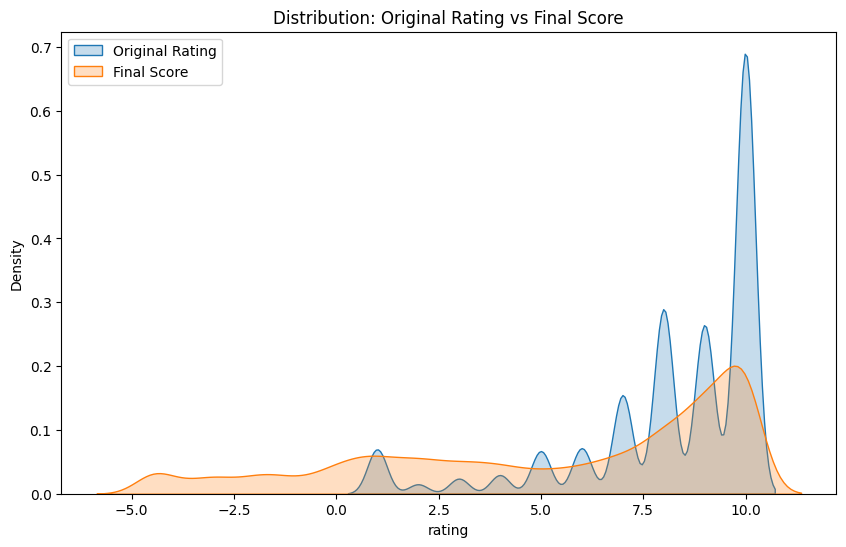

In [110]:
plt.figure(figsize=(10,6))
sns.kdeplot(df["rating"], label="Original Rating", fill=True)
sns.kdeplot(df["score_final"], label="Final Score", fill=True)
plt.title("Distribution: Original Rating vs Final Score")
plt.legend()
plt.show()

In [58]:
df.sample(10)[[
    "rating",
    "rating_normalized",
    "camelbert_sentiment_score",
    "score_final"
]]

,rating,rating_normalized,camelbert_sentiment_score,score_final
15311,10.0,1.0,9.5,9.75
63809,10.0,1.0,10.0,10.00
29011,7.0,0.7,1.7,4.35
63581,8.0,0.8,2.5,5.25
77968,10.0,1.0,10.0,10.00
66647,3.0,0.3,0.0,1.50
53681,10.0,1.0,10.0,10.00
38112,9.0,0.9,6.1,7.55
76176,10.0,1.0,10.0,10.00
18125,1.0,0.1,0.0,0.50


In [112]:
df.to_csv('../data/tokenized/03_data_cleaned_full_tokens_final_score.csv')
print("Database saved.")

Database saved.
